In [19]:
import logging
logging.basicConfig(format='%(levelname)s: %(message)s', level=logging.INFO)  # set level to INFO for wordy
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import dill

import numpy as np

from extravaganza.experiments import Experiment
from extravaganza.utils import get_color, render, ylim

# Load

In [78]:
# check all the saved experiments we can load
print('Experiments we can load:\n')
for fname in np.sort(os.listdir('../logs')):
    if '.pkl' not in fname: continue
    print('\t- {}'.format(fname[:-4]))

Experiments we can load:

	- coco_1046
	- coco_2049
	- coco_304
	- coco_682
	- coco_684
	- gym_CartPoleContinuous-v1
	- lds_constant
	- lds_gaussian
	- lds_sinusoidal
	- lds_squarewave
	- pid_????
	- pid_test


In [88]:
name = 'lds_squarewave'
filename = '../logs/{}.pkl'.format(name)
experiment = Experiment.load(filename)

INFO: (EXPERIMENT) loaded experiment from `../logs/lds_squarewave.pkl`


# Plot

In [83]:
def plot(experiment: Experiment):
    assert experiment.stats is not None, 'cannot plot the results of an experiment that hasnt been run'
    all_stats = experiment.stats
    
    # clear plot and calc nrows
    plt.clf()
    n = 2
    nrows = n #+ (len(all_stats) + 1) // 2
    fig, ax = plt.subplots(nrows, 2, figsize=(16, 6 * nrows))

    # plot stats
    for i, (method, stats) in enumerate(all_stats.items()):
        if stats is None: 
            print('WARNING: {} had no stats'.format(method))
            continue
        stats.plot(ax[0, 0], 'Kp', label=method, color=get_color(method))
        stats.plot(ax[1, 0], 'rewards', label=method)
        stats.plot(ax[1, 1], 'avg rewards since reset', label=method)
#         i_ax = ax[n + i // 2, i % 2]
        stats.plot(ax[0, 1], 'disturbances', label=method)
#         stats.plot(i_ax, 'K @ state', label='K @ state')
#         stats.plot(i_ax, 'M \cdot w', label='M \cdot w')
#         stats.plot(i_ax, 'M0', label='M0')
#         i_ax.set_title('u decomp for {}'.format(method))
#         i_ax.legend()
    
    # (note: `ylim()` is so useful! because sometimes one thing blows up and then autoscale messes up all plots)
    _ax = ax[0, 0]; _ax.set_title('Kp'); _ax.legend()#; ylim(_ax, -5, 20)
    _ax = ax[0, 1]; _ax.set_title('Disturbances'); _ax.legend()#; ylim(_ax, -0.5, 0.5)
    _ax = ax[1, 1]; _ax.set_title('Instantaneous Rewards'); _ax.legend()#; ylim(_ax, -5, 100)
    _ax = ax[1, 0]; _ax.set_title('Average Rewards'); _ax.legend()#; ylim(_ax, -0.05, 1.)
    pass

<Figure size 640x480 with 0 Axes>

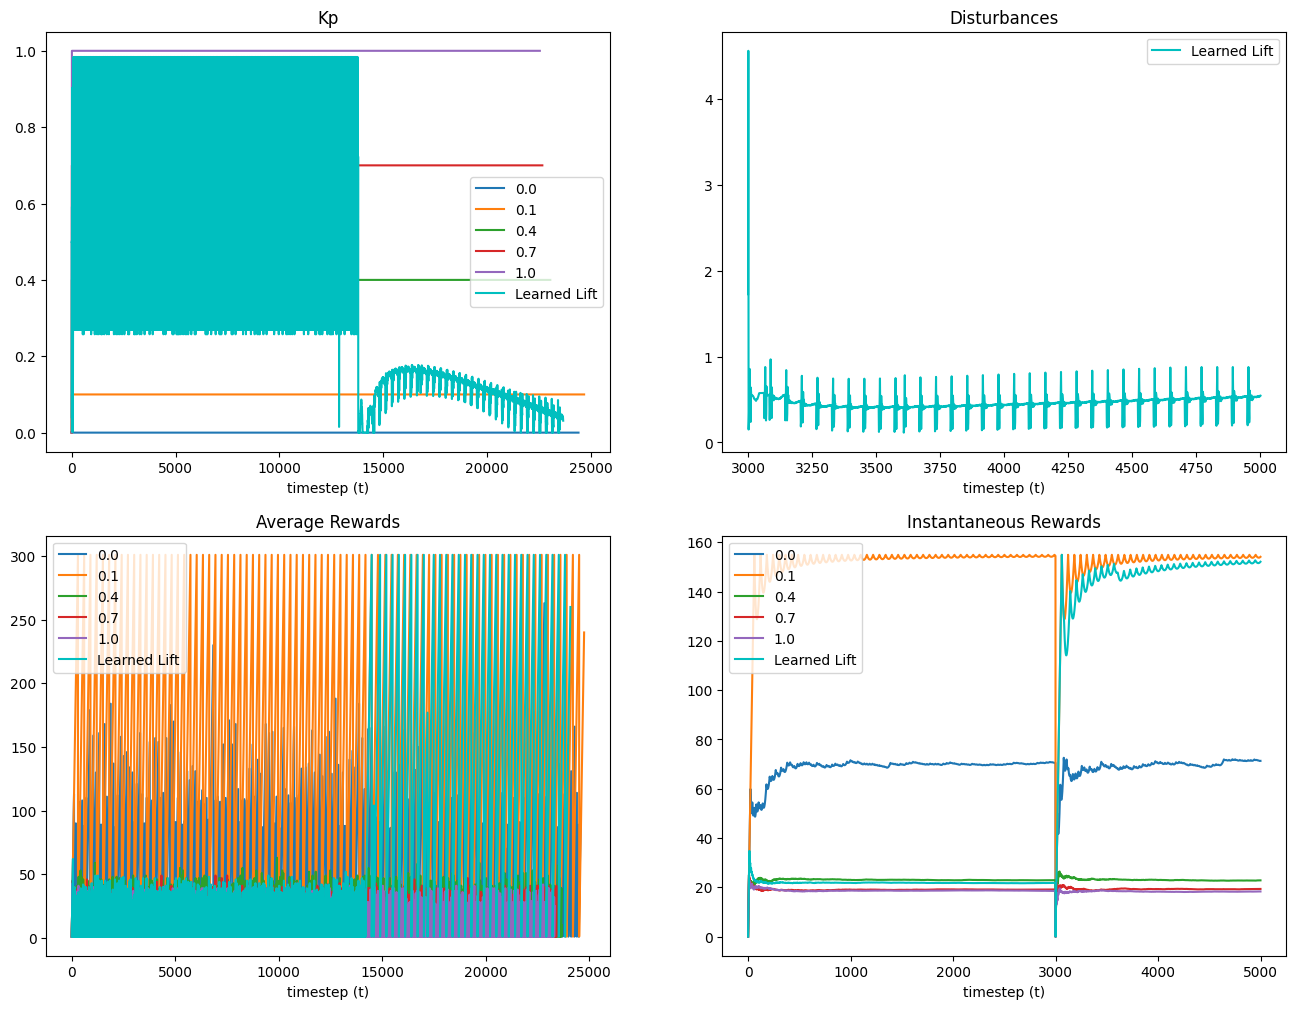

In [81]:
plot(experiment)
plt.savefig('../plots/{}.png'.format(name))

# Render

In [55]:
# dynamic plot
save_path = None # '../plots/{}.mp4'.format(name)
anim = render(experiment, 'xs', 'fs', sliderkey='us', save_path=save_path, duration=5, fps=30)
vid = anim.to_html5_video()
HTML(vid)

INFO: (RENDERER): rendering the stats of the following: ['LQR', 'HINF', 'GPC', 'BPC', 'RBPC', 'No Lift', 'Learned Lift']
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: (STATS): prepared to render ('xs', 'fs') over time with slider us!
INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 600x600 -pix_fmt rgba -r 30 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y ../plots/lds_squarewave.mp4
/Users/evandigiorno/Desktop/extravaganza/env/lib/python3.10/site-packages/extravaganza/utils.py:98: Use

In [84]:
def plot_lds(experiment: Experiment):
    assert experiment.stats is not None, 'cannot plot the results of an experiment that hasnt been run'
    all_stats = experiment.stats
    
    # clear plot and calc nrows
    plt.clf()
    n = 4
    nrows = n + (len(all_stats) + 1) // 2
    fig, ax = plt.subplots(nrows, 2, figsize=(16, 6 * nrows))

    # plot stats
    for i, (method, stats) in enumerate(all_stats.items()):
        if stats is None: 
            logging.warning('{} had no stats'.format(method))
            continue
        stats.plot(ax[0, 0], 'xs', label=method)
#         stats.plot(ax[0, 1], 'ws', label=method)
        stats.plot(ax[3, 1], 'us', label=method)
        if 'costs' in stats:
            stats.plot(ax[1, 0], 'avg costs', label=method)
            stats.plot(ax[1, 1], 'costs', label=method)
        else:
            stats.plot(ax[1, 0], 'avg fs', label=method)
            stats.plot(ax[1, 1], 'fs', label=method)
    
        stats.plot(ax[2, 0], '||A||_op', label=method)
        stats.plot(ax[2, 1], '||B||_F', label=method)
        stats.plot(ax[3, 0], '||A-BK||_op', label=method)
        i_ax = ax[n + i // 2, i % 2]
        stats.plot(ax[0, 1], 'disturbances', label=method)
        stats.plot(i_ax, 'K @ state', label='K @ state')
        stats.plot(i_ax, 'M \cdot w', label='M \cdot w')
        stats.plot(i_ax, 'M0', label='M0')
        i_ax.set_title('u decomp for {}'.format(method))
        i_ax.legend()

    # set titles and legends and limits and such
    # (note: `ylim()` is so useful! because sometimes one thing blows up and then autoscale messes up all plots)
    _ax = ax[0, 0]; _ax.set_title('position'); _ax.legend()
    _ax = ax[0, 1]; _ax.set_title('disturbances'); _ax.legend()
    _ax = ax[1, 0]; _ax.set_title('avg costs'); _ax.legend()
    _ax = ax[1, 1]; _ax.set_title('costs'); _ax.legend()
    
    _ax = ax[2, 0]; _ax.set_title('||A||_op'); _ax.legend()
    _ax = ax[2, 1]; _ax.set_title('||B||_F'); _ax.legend()
    
    _ax = ax[3, 0]; _ax.set_title('||A-BK||_op'); _ax.legend()
    _ax = ax[3, 1]; _ax.set_title('controls'); _ax.legend()
    pass

<Figure size 640x480 with 0 Axes>

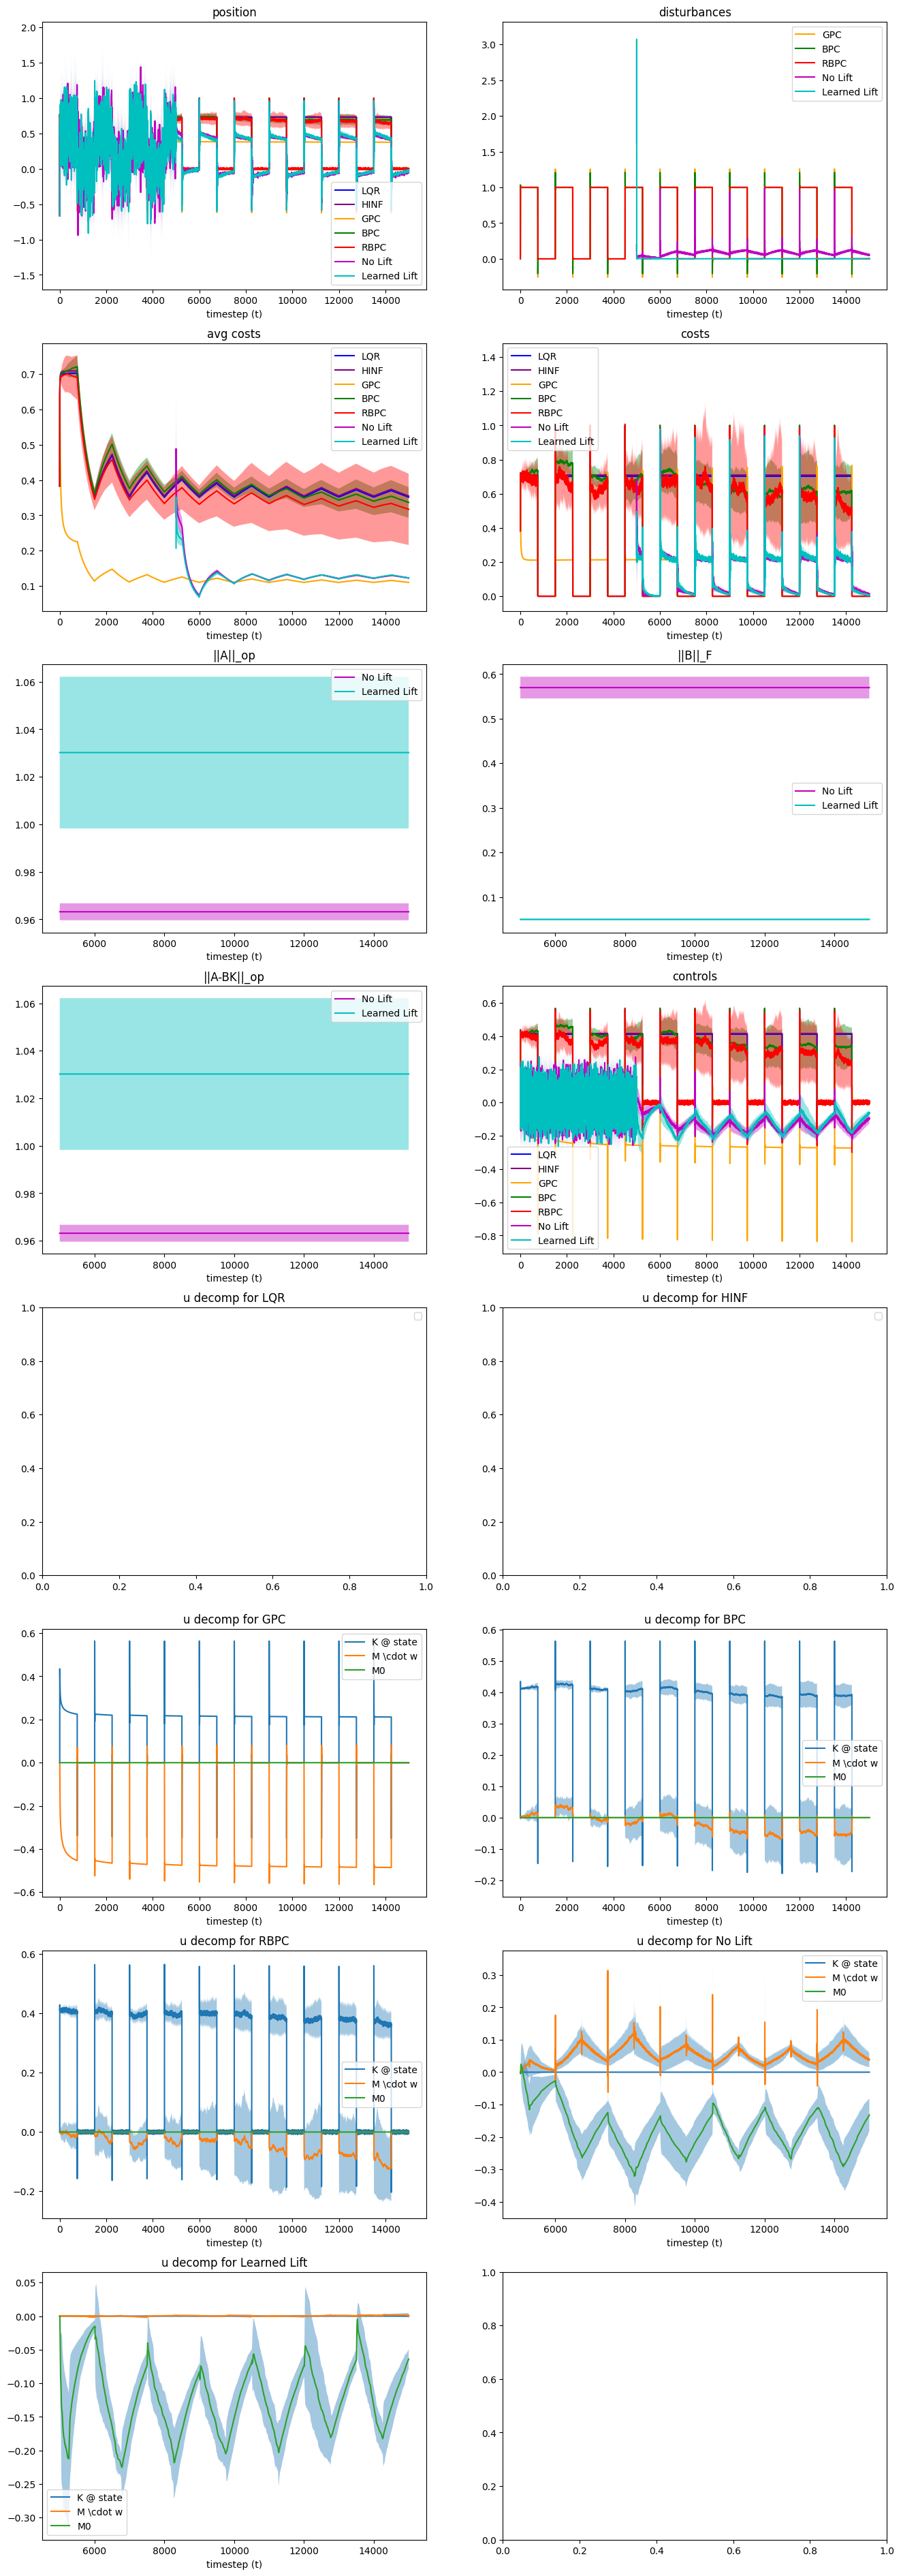

In [89]:
plot_lds(experiment)